<a href="https://colab.research.google.com/github/sathyanarayanajammala/GenAI/blob/main/M1_AST1_Predictive_AI_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI and Prompt Engineering
## A program by IISc and TalentSprint
### Assignment: 1

## Learning Objectives

At the end of the experiment, you will be able to

* Get introduced to PyTorch and it's usage
* Apply neural networks to regression problems
* Learn about image classification tasks
* Understand & build Dense Neural Network  model class in PyTorch
* Train and test the model in PyTorch
* Understand the concept of transfer learning and pre-trained models

### Introduction

Artificial Neural Network (ANN) is a Machine Learning model inspired by the networks of biological neurons found in our brains.

#### Artificial Neurons

Modeled after human brain activity, artificial neurons are digital constructs that simulate the behavior of biological neurons in some ways. The first computational model of an (artificial) neuron was proposed by Warren McCulloch (neuroscientist) and Walter Pitts (logician) in 1943.

As shown below, it may be divided into 2 parts. The first part, g takes an input, performs aggregation, and based on the aggregated value, the second part, f, makes a decision. Understand further through an example 'Watch a football game' in this [article](https://towardsdatascience.com/mcculloch-pitts-model-5fdf65ac5dd1).

<br><br>
<center>
<img src="https://miro.medium.com/max/369/1*fDHlg9iNo0LLK4czQqqO9A.png" width= 320px/>
</center>

<br><br>


### Install the required packages

In [1]:
!pip install torchsummary

### Setup Steps:

In [2]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2416497" #@param {type:"string"}

In [3]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "6301058763" #@param {type:"string"}

In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M1_AST1_Predictive_AI_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://genai-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import required packages

In [5]:
# Importing torch packages
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
from torchvision import datasets, transforms
from torchsummary import summary
import torchvision.models as models

# Importing other packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Import pytorch, the deep learning library which will be used in the assignment, and torchvision, which provides the dataset and data transformations.

* import torch.nn (pytorch’s neural network library), torch.nn.functional (includes non-linear functions like ReLu and sigmoid) and torch.optim for implementing various optimization algorithms.

#  1.Introduction to PyTorch

PyTorch is an open-source deep learning framework developed by Facebook's AI Research lab (FAIR). It provides a flexible and intuitive platform for building, training, and deploying deep learning models. PyTorch is widely used in both academia and industry due to its dynamic computation graph, ease of use, and robust support for GPU acceleration.

### Overview of PyTorch

1. **Dynamic Computation Graphs (Define-by-Run)**:
   - PyTorch uses dynamic computation graphs, which are constructed on-the-fly as operations are performed. This is in contrast to static computation graphs used by frameworks like TensorFlow (prior to TensorFlow 2.0).
   - The dynamic nature allows for more flexibility and ease of debugging, as the graph is built dynamically during runtime.

2. **Tensor Library**:
   - PyTorch's tensor library is similar to NumPy but with strong GPU acceleration.
   - Tensors are the fundamental building blocks in PyTorch, representing multi-dimensional arrays.

3. **Autograd**:
   - PyTorch's automatic differentiation engine, Autograd, enables automatic computation of gradients. This is essential for training neural networks using gradient-based optimization algorithms.
   - Autograd records operations performed on tensors to create a computation graph and compute gradients during backpropagation.

4. **Modules and nn.Module**:
   - PyTorch's `nn` module provides a high-level interface for building neural networks. The `nn.Module` class is a base class for all neural network modules.
   - Layers, loss functions, and optimizers are provided within the `nn` module, facilitating the construction of complex neural networks.

5. **Extensive Ecosystem**:
   - PyTorch has a rich ecosystem, including libraries like torchvision (for computer vision), torchaudio (for audio processing), and torchtext (for natural language processing).
   - Integration with other tools such as TensorBoard for visualization and ONNX for model export enhances its utility.

### Advantages of Using PyTorch for Deep Learning

1. **Ease of Use and Flexibility**:
   - PyTorch's dynamic computation graph and Pythonic nature make it intuitive and easy to use, especially for researchers and developers who prefer interactive and imperative programming.
   - The ability to modify the computation graph on-the-fly allows for more flexibility in model design and experimentation.

2. **Strong GPU Support**:
   - PyTorch provides seamless integration with CUDA, enabling efficient utilization of GPU resources for accelerated computation.
   - Multi-GPU support and distributed training capabilities allow for scaling up models and training on large datasets.

3. **Community and Support**:
   - PyTorch has a large and active community, contributing to a wealth of tutorials, code examples, and pre-trained models.
   - Continuous updates and improvements from both the open-source community and Facebook AI Research ensure that PyTorch stays at the cutting edge of deep learning technology.

4. **Interoperability**:
   - PyTorch's support for ONNX (Open Neural Network Exchange) allows for easy model export and interoperability with other frameworks and platforms.
   - This makes it convenient to deploy PyTorch models in various production environments.

5. **Debugging and Prototyping**:
   - The dynamic nature of PyTorch makes it easier to debug and prototype models. Developers can use standard Python debugging tools to inspect and modify the computation graph.
   - The interactive experience provided by Jupyter notebooks and other IDEs is enhanced by PyTorch’s immediate execution model.

6. **Research and Innovation**:
   - PyTorch's flexibility and ease of use make it a popular choice among researchers for developing and testing new ideas.
   - Many cutting-edge research papers and innovations in the field of deep learning are implemented and shared using PyTorch.

In [25]:
# Creating a tensor
x = torch.tensor([[1, 2], [3, 4]])
print(x)

tensor([[1, 2],
        [3, 4]])


In [26]:
# Tensor operations
y = torch.ones(2, 2)
print(y)
z = x + y
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 3.],
        [4., 5.]])


In [27]:
# Autograd
# Requires_grad flag for automatic differentiation
x = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)
y = torch.tensor([[5., 6.], [7., 8.]], requires_grad=True)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[5., 6.],
        [7., 8.]], requires_grad=True)


In [28]:
# Computation
z = x + y
print(z)

tensor([[ 6.,  8.],
        [10., 12.]], grad_fn=<AddBackward0>)


In [29]:
# Computing gradients
t = torch.sum(z)
t.backward()

# Accessing gradients

print("Gradient of x:")
print(x.grad)

print("Gradient of y:")
print(y.grad)

Gradient of x:
tensor([[1., 1.],
        [1., 1.]])
Gradient of y:
tensor([[1., 1.],
        [1., 1.]])


### Implement Dense Neural Network using PyTorch

### The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (shown in the figure below) called a **Neurons**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The Neurons computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.
<br><br>
<center>
<img src="https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1004.png" width= 400px/>
</center>

$\hspace{10cm} \text {Threshold logic unit}$
<br><br>
The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{
  \begin{aligned}
    &0&  if\ \  z < 0\\
    &1&  if\ \  z \ge 0\\
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{
  \begin{aligned}
    &-1&  if\ \  z < 0\\
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\
  \end{aligned}
  \right.
\end{equation}
$$

A single Neuron can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class.



The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.

# 2.Univariate Linear Regression

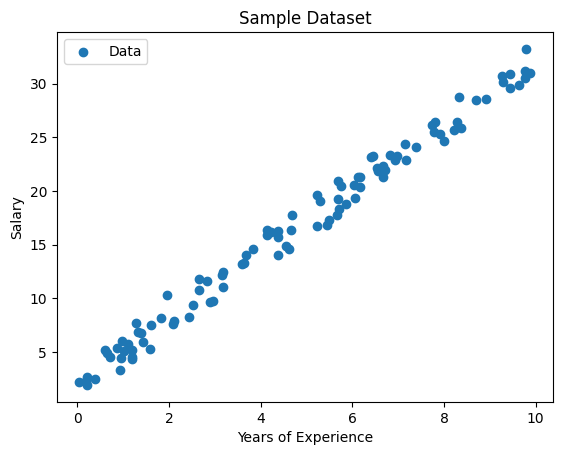

### Create the sample data

In [30]:
# Generating a sample dataset
np.random.seed(0)
X_uni = np.random.rand(100, 1) * 10  # Years of experience (between 0 and 10)
y_uni = 3 * X_uni + 2 + np.random.randn(100, 1)  # Salary, with some noise

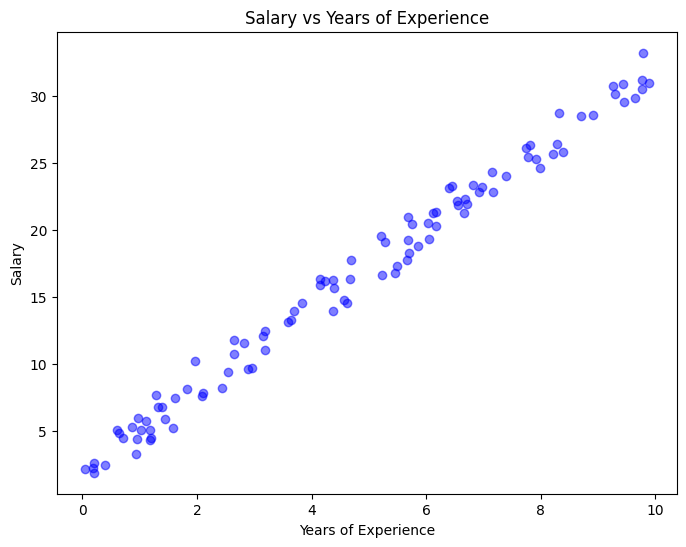

In [31]:
# Visualizing the data
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_uni, y_uni, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')

# Show the plot
plt.show()

In [32]:
# Convert the data to PyTorch tensors
X_uni_tensor = torch.tensor(X_uni, dtype=torch.float32)
y_uni_tensor = torch.tensor(y_uni, dtype=torch.float32)

In [33]:
# Define the Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
# Create an instance of the model
# YOUR CODE HERE

In [ ]:
# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(X_uni_tensor)  # Forward pass
    loss = criterion(outputs, y_uni_tensor)  # Compute the loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update the weights

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
# Making predictions
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_uni_tensor)

In [ ]:
# Convert predictions to numpy array
# YOUR CODE HERE

In [ ]:
# Printing the model coefficients
# YOUR CODE HERE

In [ ]:
# Plotting the results
plt.scatter(X_uni, y_uni, color='blue', label='Original data')
plt.plot(X_uni, y_pred, color='red', label='Fitted line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


A basic neural network architecture consists of an input layer, one or more hidden layers, and an output layer. The input layer receives the raw data, with each neuron representing a feature. Hidden layers contain neurons that process inputs using learned weights and biases, applying an activation function (like ReLU or sigmoid) to introduce non-linearity. The output layer produces the final prediction, with neurons corresponding to the output classes (for classification) or a single neuron (for regression). The network learns by adjusting weights and biases to minimize a loss function using backpropagation and an optimization algorithm like gradient descent.

## Initializing CUDA

CUDA is used as an interface between the code and the GPU.

Normally, the code is run in the CPU. To run it in the GPU, we need CUDA. Check if CUDA is available:

In [ ]:
# To test whether GPU instance is present in the system or not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

If it's False, then the program is executed on CPU. If it's True, then the program is executed on GPU.

Initialize some GPU-related variables:

In [ ]:
device = torch.device("cuda" if use_cuda else "cpu")
device

# 3.Multivariate Classification

### Dataset Description

The MNIST digits dataset is a widely used benchmark in machine learning and computer vision. It consists of 70,000 grayscale images of handwritten digits, ranging from 0 to 9. Each image is 28x28 pixels, resulting in a total of 784 features per image. The dataset is split into 60,000 training images and 10,000 test images. Each image is labeled with the correct digit, making it a supervised learning dataset. MNIST is commonly used for training and testing image classification algorithms, particularly in the fields of neural networks and deep learning.

## Load MNIST data

Load the MNIST data. It can take a while.


* Load both the training set and the testing sets

* Use  transform.compose() to convert the datasets into tensors using transforms.ToTensor(). We also normalize them by setting the mean and standard deviation using transforms.Normalize().

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

When dealing with an image, text, audio, or video footage, one would use Python packages to load that data into a NumPy array and then convert the array into a tensor. Fortunately, PyTorch makes the process easier by offering a library called torchvision. This library provides useful tools such as data loaders, datasets, and data transformers for pixelated images.

### **Image Preprocessing with transforms.Compose**

When working with image data in deep learning, especially in PyTorch, preprocessing steps are essential to ensure the data is in the right format and range for the neural network.

Two common preprocessing steps are converting images to tensors and normalizing their pixel values. This section explains why these steps are necessary and how they are achieved using torchvision.transforms.

Why Preprocess Images?

1. Conversion to Tensors:

  * Neural networks in PyTorch require input data to be in the form of tensors. Tensors are the primary data structure in PyTorch, similar to arrays in NumPy but with added functionality for GPU acceleration.

  * Converting images to tensors ensures compatibility with PyTorch's neural network modules and allows efficient computation.


2. Normalization:

  * Normalizing images is a crucial step that helps in faster convergence during training. It scales the pixel values to a standardized range, which can lead to more stable and faster training.

  * Typically, pixel values of images range from 0 to 255. However, for neural networks, it's beneficial to have these values in a smaller range, often between -1 and 1.

  * Normalizing the data helps to ensure that each input feature (in this case, pixel values) has a similar distribution, which helps the neural network learn more effectively.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

**Let's break down each transformation:**

1. transforms.ToTensor():

  * Converts a PIL Image or NumPy ndarray to a PyTorch tensor.

  * Scales the pixel values from the range [0, 255] to [0.0, 1.0].

2. transforms.Normalize((0.5,), (0.5,)):

  * Normalizes the tensor image with a mean of 0.5 and a standard deviation of 0.5.
  * The formula used for normalization is:
  
$$ \text{normalized_pixel} = \frac{\text{original_pixel} - \text{mean}}{\text{std}} $$
  ​

  * Given the original pixel values are in [0.0, 1.0], normalizing with mean=0.5 and std=0.5 will transform these values to the range [-1.0, 1.0].

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=20, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=20, shuffle=True)

Next, there is a training set, testing set, train loader, and test loader.

When working with large amounts of data, the DataLoader class is useful because it generates the data on multiple cores in real-time and directly feeds it into the deep learning model.

A DataLoader can be given a batch_size, which denotes the number of samples in each generated batch, and the shuffle parameter can be set to randomize the data sequence.

In [ ]:
for (X_train, y_train) in train_loader:
    # YOUR CODE HERE check the size and type of training set

The train and test data are provided via data loaders that provide iterators over the datasets.

The first element of training data (X_train) is a 4th-order tensor of size (batch_size, 1, 28, 28), i.e. it consists of a batch of images of size 1x28x28 pixels. y_train is a vector containing the correct classes ("0", "1", ..., "9") for each training image. Here batch size is 20.


## Plotting the images

In [ ]:
labels =[]
features = []
for X,y in zip(X_train, y_train):
  # Getting unique labels
  if y not in labels:
    labels.append(y)
    features.append(X)

pltsize=1
plt.figure(figsize=(7,7))
for i in range(5):
    plt.subplot(3,3, i+1)
    plt.axis('off')
    # Convert the tensor to numpy for displaying the image
    plt.imshow(features[i].numpy().reshape(28,28), cmap="gray")
    plt.title(f'Label: {labels[i]}')

### Dense Neural Network Classifiers

Dense Neural Networks can be used for classification and regression tasks. In classification, they can perform (i) Binary Classification (ii) Multilabel Binary Classification, and (iii) Multiclass classification

* **Binary classification:** Used when there are only two distinct classes and the data we want to classify belongs exclusively to one of those classes, e.g. classifying if a review sentiment is positive or negative.

* **Multilabel binary classification:** Used when there are two or more classes and the data we want to classify belongs to none of the classes or all of them at the same time, e.g. classifying which traffic signs are shown in an image.

  Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels

* **Multiclass classification:** Used when there are three or more classes and the data we want to classify belongs exclusively to one of those classes, e.g.  out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), we need to have one output neuron per class, and we should use the **softmax activation function** for the whole output layer as shown in the figure below. The softmax function will ensure that all the estimated probabilities are between $0$ and $1$ and that they add up to $1$.
<br><br>
<center>
<img src="https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1009.png" width=500px/>
</center>

Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss (also called the log loss) is generally a good choice.

## Defining the Dense Neural Network’s Architecture

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.log_softmax(x, dim=1)
        return x

The given code defines a neural network architecture in PyTorch, consisting of a series of fully connected (dense) layers. This architecture is designed for image classification, particularly suitable for datasets like MNIST, where each image is 28x28 pixels.

Architecture Details:
1. **Input Layer**: The model accepts input images flattened into a 1D array of size 784 (28x28).
2. **First Fully Connected Layer (fc1)**: This layer maps the 784 input features to 256 neurons. The activation function used is ReLU (Rectified Linear Unit), which introduces non-linearity.
3. **Second Fully Connected Layer (fc2)**: This layer further reduces the feature dimensions from 256 to 128, with ReLU activation.
4. **Third Fully Connected Layer (fc3)**: The feature dimensions are reduced from 128 to 64, again with ReLU activation.
5. **Output Layer (fc4)**: The final layer outputs 10 neurons, corresponding to the 10 possible classes (digits 0-9). The output is passed through a log-softmax function, which converts the raw output scores into log probabilities.

Model Forward Pass:
In the `forward` method, the input tensor `x` is first reshaped to ensure it has the correct dimensions for processing. It is then passed through each fully connected layer with ReLU activations applied at each step, except the output layer. The final output, `x`, represents the log probabilities of each class.

#### Calling the instances of the network

In [ ]:
# YOUR CODE HERE create the model instance

In [ ]:
summary(model, input_size=(1,28,28), batch_size=1)

#### Defining the loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

#### Training and Evaluating the model

<br><br>
<center>
<img src="https://cdn.exec.talentsprint.com/static/aimlops/c3/Train.png" width=500px/>
</center>

In Training Phase, iterate over a batch of images in the train_loader. For each batch, perform  the following steps:

* First zero out the gradients using zero_grad()

* Pass the data to the model i.e. perform forward pass by calling the forward()

* Calculate the loss using the actual and predicted labels

* Perform Backward pass using backward() to update the weights

In [ ]:
# No of Epochs
epoch = 2

# keeping the network in train mode
model.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_loader:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Passing the data to the model (Forward Pass)
      outputs = model(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()

    # Accuracy calculation
    train_losses.append(train_loss/len(mnist_trainset))
    train_accuracy.append(100 * correct/len(mnist_trainset))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))

In Testing Phase, iterate over a batch of images in the test_loader. For each batch, perform the following steps:

* Pass the images through the model (network) to get the outputs
* Pick the class / label with the highest probability
* Calculate the accuracy

In [ ]:
# Keeping the network in evaluation mode
# YOUR CODE HERE set the model to evaluation mode

# Iterate through all the batches in each epoch
for images,labels in test_loader:

    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the forward pass
    outputs = model(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()

# YOUR CODE HERE print the accuracy

## Transfer Learning with Pretrained Models

#### Introduction to Transfer Learning

Transfer learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. This is especially useful in deep learning where training models from scratch can be computationally expensive and require large amounts of data. Instead of training a model from the ground up, transfer learning leverages the knowledge acquired by a pre-trained model on a large dataset, transferring this knowledge to a new, related task.

#### How Transfer Learning Works

1. **Pre-training**: A model is first trained on a large and diverse dataset. For instance, models like VGG, ResNet, and BERT are pre-trained on datasets such as ImageNet for image tasks and large corpora of text for NLP tasks.
2. **Fine-tuning**: The pre-trained model is then fine-tuned on the specific dataset of the target task. This involves either:
   - Using the pre-trained model as a fixed feature extractor, where the pre-trained layers are frozen, and only the final layer(s) are trained.
   - Unfreezing some of the pre-trained layers and training them along with the final layers to adapt the model more closely to the new task.

#### Benefits of Using Pre-trained Models

1. **Reduced Training Time**: Pre-trained models significantly cut down the time required to train a model. Since the pre-trained model has already learned a lot of features, the training process focuses on fine-tuning these features rather than learning from scratch.

2. **Improved Performance**: Models pre-trained on large datasets typically capture a wide variety of features that can be beneficial for the target task. This usually results in better performance compared to models trained from scratch, especially when the target dataset is small.

3. **Data Efficiency**: Transfer learning is particularly valuable when the target task has limited data. The pre-trained model can generalize better from limited data, leveraging the knowledge it gained from the large pre-training dataset.

4. **Overfitting Prevention**: Pre-trained models, having been exposed to a large amount of diverse data, are less prone to overfitting on small datasets. This helps in creating more robust models.

5. **Access to Advanced Architectures**: Utilizing pre-trained models often means leveraging advanced model architectures that have been extensively tested and validated by the research community. This provides a strong starting point for building state-of-the-art solutions.

#### Examples in Practice

1. **Image Classification**: Transfer learning is widely used in image classification tasks. Models pre-trained on the ImageNet dataset are commonly used as the basis for tasks involving medical imaging, object detection, and more.

2. **Natural Language Processing (NLP)**: In NLP, models like BERT, GPT, and T5, pre-trained on massive text corpora, are fine-tuned for specific tasks such as sentiment analysis, named entity recognition, and question answering.

3. **Speech Recognition**: Models pre-trained on large speech datasets are fine-tuned for specific applications like voice assistants, transcription services, and more.

Transfer learning, particularly with pre-trained models, offers a powerful approach to machine learning by leveraging existing knowledge to tackle new problems efficiently and effectively. By reducing training time, improving performance, enhancing data efficiency, preventing overfitting, and providing access to advanced architectures, transfer learning enables practitioners to develop high-performing models even with limited resources.

### Visualizing one image from the test dataset

In [ ]:
# Iterate through the testloader and extract one image and label
for images, labels in test_loader:
  image = images[0]  # Take the first image from the batch
  label = labels[0]  # Take the corresponding label
  break  # Exit the loop after extracting one sample

# Print the shape of the image and the label
print("Image shape:", image.shape)
print("Label:", label)

In [ ]:
# Reshape the image to [1, 1, 28, 28]
image_reshaped = image.unsqueeze(0)  # Add a batch dimension
print("Reshaped image shape:", image_reshaped.shape)

In [ ]:
# Convert the tensor to numpy for displaying the image
# YOUR CODE HERE  # Remove batch dimension and convert to numpy

# Display the image
# YOUR CODE HERE
plt.axis('off')  # Hide axes
plt.show()

### Load ResNet50 model and fine-tune it

In [ ]:
# Load pretrained ResNet50 model
model = models.resnet50(pretrained=True)

In [ ]:
# Modify the final fully connected layer to match the number of classes in Fashion MNIST
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

# Move the model to the device (GPU if available)
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training is expected to take time

In [ ]:
# Train the model
epoch = 2
model.train()
train_losses, train_accuracy = [], []

for e in range(epoch):
    train_loss = 0
    correct = 0
    for images, labels in train_loader:
        resize_transform = transforms.Resize((224, 224))
        resized_image = resize_transform(images)
        resized_image = resized_image.repeat(1, 3, 1, 1)
        images = resized_image.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(mnist_trainset))
    train_accuracy.append(100 * correct / len(mnist_trainset))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e + 1, train_losses[-1], train_accuracy[-1]))

In [ ]:
# Evaluate the model
model.eval()
Test_accuracy = 0

for images, labels in test_loader:
    resize_transform = transforms.Resize((224, 224))
    resized_image = resize_transform(images)
    resized_image = resized_image.repeat(1, 3, 1, 1)
    images = resized_image.to(device)
    labels = labels.to(device)

    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()

Accuracy = 100 * Test_accuracy / len(mnist_testset)
print("Accuracy of Test Data is", Accuracy)

### Please answer the questions below to complete the experiment:




In [ ]:
#@title What is the role of feature engineering in predictive modeling? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "To clean the data", "To create new features from existing data", "To split the data into training and test sets", "To evaluate the model"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")